In [ ]:
#   September 2020
#   @Authors: Federicodip05, eugeniafontecha

# Naïve Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import unicodedata
import re
import matplotlib.pyplot as plt
df = pd.read_excel('PreferenciasBritanicos(1).xlsx',engine='openpyxl')
df_not = pd.read_excel('Noticias_argentinas.xlsx',engine='openpyxl')
df_admision = pd.read_csv('binary.csv')


# Ejercicio 1

**Probabilidades condicionales**

Una estación de radio tiene dos grupos de oyentes, los jóvenes y los viejos. 
Se sabe que si el oyente es joven hay una probabilidad del 95 % de que le guste el programa 1, una probabilidad del 5 % de que le guste el programa 2, una probabilidad del 2 % de que le guste programa 3 y una probabilidad del 20 % de que le guste el programa 4.
Por otro lado, si el oyente es viejo, hay una probabiliad del 3 % de que le guste el programa 1, una probabilidad del 82 % de que le guste el programa 2, una probabilidad del 34 % de que le guste el programa 3 y una probabilidaddel 92 % deque le guste el programa 4. 
Se sabe también que el 90 % de los oyentes son viejos.
Un nuevo oyente escucha los programas 1 y 3 pero no le gustan los programas 2 y 4.
Calcular la probabilidad de que este oyente sea joven y la probabilidad de que sea viejo.

---
Jóvenes: 0.10 = **P_Joven** -> Probabilidad de ser joven

Programa 1: 0.95 = **P_P1J** -> Probabilidad de que le guste P1 dado que es joven

Programa 2: 0.05 = **P_P2J** -> Probabilidad de que le guste P2 dado que es joven

Programa 3: 0.02 = **P_P3J** -> Probabilidad de que le guste P3 dado que es joven

Programa 4: 0.20 = **P_P4J** -> Probabilidad de que le guste P4 dado que es joven

---

Viejos: 0.90 = **P_Viejo** -> Probabilidad de ser viejo

Programa 1: 0.03 = **P_P1V** -> Probabilidad de que le guste P1 dado que es viejo

Programa 2: 0.82 = **P_P2V** -> Probabilidad de que le guste P2 dado que es viejo

Programa 3: 0.34 = **P_P3V** -> Probabilidad de que le guste P3 dado que es viejo

Programa 4: 0.92 = **P_P4J** -> Probabilidad de que le guste P4 dado que es viejo

---

In [ ]:
P_Viejo= 0.90
P_P1V= 0.03
P_P2V= 0.82
P_P3V= 0.34
P_P4V= 0.92

P_Joven= 0.10
P_P1J= 0.95
P_P2J= 0.05
P_P3J= 0.02
P_P4J= 0.20

**P_ProgramasOyenteJoven** -> P(joven^1,3,\~2,\~4) = P(1,3,\~2,\~4|joven)*P(joven)  Probabilidad de ser joven y tener esos gustos

**P_ProgramasOyenteViejo** -> P(viejo^1,3,\~2,\~4) = P(1,3,\~2,\~4|viejo)*P(viejo) Probabilidad de ser viejo y tener esos gustos


In [ ]:
P_NP2J= 1 - P_P2J
P_NP4J= 1 - P_P4J

#Suponiendo que las variables son independientes (dada la clase joven):
P_ProgramasOyenteJoven = P_P1J * P_P3J * P_NP2J * P_NP4J*P_Joven

print('P_ProgramasOyenteJoven: ' + str(P_ProgramasOyenteJoven))

P_NP2V= 1 - P_P2V
P_NP4V= 1 - P_P4V

#Suponiendo que las variables son independientes (dada la clase viejo):
P_ProgramasOyenteViejo = P_P1V * P_P3V * P_NP2V * P_NP4V*P_Viejo

print('P_ProgramasOyenteViejo: ' + str(P_ProgramasOyenteViejo))


P_ProgramasOyenteJoven: 0.0014440000000000002
P_ProgramasOyenteViejo: 0.00013219199999999997


Por el teorema de la probabilidad total:

P(1,3,\~2,\~4) = P(1,3,\~2,\~4|joven)\*P_Joven + P(1,3,\~2,\~4|viejo)\*P_Viejo -> **P_ProgramasOyente**



In [ ]:
P_ProgramasOyente = (P_P1J * P_P3J * (1- P_P2J) * (1- P_P4J)) * P_Joven + (P_P1V * P_P3V * (1- P_P2V) * (1- P_P4V)) * P_Viejo
print(P_ProgramasOyente)

0.0015761920000000001


Calculamos la probabilidad de cada clase dados los gustos de programas.

**P_OyenteJoven** -> P(joven|1,3,\~2,\~4) = P(joven^1,3,\~2,\~4)/P(1,3,\~2,\~4)

**P_OyenteViejo** -> P(viejo|1,3,\~2,\~4) = P(viejo^1,3,\~2,\~4)/P(1,3,\~2,\~4)

In [ ]:
P_OyenteJoven= P_ProgramasOyenteJoven/P_ProgramasOyente

P_OyenteViejo= P_ProgramasOyenteViejo/P_ProgramasOyente

print('Probabilidad de que el oyente sea joven: ' + str(round(P_OyenteJoven*100,2)) + '%')

print('\nProbabilidad de que el oyente sea viejo: ' + str(round(P_OyenteViejo*100,2)) + '%')

Probabilidad de que el oyente sea joven: 91.61%

Probabilidad de que el oyente sea viejo: 8.39%


# Ejercicio 2

**Clasificador ingenuo de Bayes**

Consideremos el siguiente vector de atributos binarios:

        (scones, cerveza, whisky, avena, futbol)

El vector x = (1, 0, 1, 1, 0) significa que se trata de una persona que le gustan los scones,
no toma cerveza, le gusta el whisky y la avena pero no ve futbol. En el archivo PreferenciasBritanicos.xls se encuentran las preferencias de 6 personas inglesas y 7 personas
escocesas.

a) Implementar el clasificador ingenuo de Bayes.

b) Clasificar el ejemplo x = (1, 0, 1, 1, 0) determinando si corresponde a las preferencias
de una persona inglesa o escosesa.

In [ ]:
#Datos
df

,scones,cerveza,wiskey,avena,futbol,Nacionalidad
0,0,0,1,1,1,I
1,1,0,1,1,0,I
2,1,1,0,0,1,I
3,1,1,0,0,0,I
4,0,1,0,0,1,I
5,0,0,0,1,0,I
6,1,0,0,1,1,E
7,1,1,0,0,1,E
8,1,1,1,1,0,E
9,1,1,0,1,0,E


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   scones        13 non-null     int64 
 1   cerveza       13 non-null     int64 
 2   wiskey        13 non-null     int64 
 3   avena         13 non-null     int64 
 4   futbol        13 non-null     int64 
 5   Nacionalidad  13 non-null     object
dtypes: int64(5), object(1)
memory usage: 752.0+ bytes
None


### Implementación del clasificador ingenuo de Bayes

In [ ]:
#implementación del clasificador ingenuo de Bayes
dic = {}
#para cada una de las clases (E y I) sumamos las preferencias de las personas
#para cada uno de los atributos

for i in df.index: #recorremos todos los registros
  nac = df.loc[i,'Nacionalidad']
  if nac not in dic.keys():
    dic[nac] = (df.loc[i,'scones':'futbol'].values, 1)
  else:
    dic[nac] = (dic[nac][0] + df.loc[i,'scones':'futbol'].values, dic[nac][1] + 1)

#en el diccionario nos quedan guardadas dos entradas, una para cada clase. Cada una
#tiene una tupla, donde el primer el elementos es el vector de atributos totales
#y el segundo la frecuencia absoluta de la clase

#ahora dividimos el primer elemento por la cantidad de total de registros de la clase,
#y el segundo por la cantidad total de registros

for k in dic.keys():
  dic[k] = (dic[k][0]/dic[k][1], dic[k][1]/len(df.index))


### Clasificación del  ejemplo x = (1, 0, 1, 1, 0)

In [ ]:
#caso a analizar:
x = np.array([1,0,1,1,0])

nb = {}

for k in dic.keys(): #por cada clase
  p = 1 #p va a ser la probabilidad de los atributos de x dada la clase k

  for i in range(len(x)): #por cada atributo
    if x[i] == 1:
      p = p*dic[k][0][i]
    else:
      p = p*(1-dic[k][0][i])
  nb[k] = p*dic[k][1] #probabilidad de los atributos de x dada la clase k * probabilidad de la clase k

#para ver cuál es la clase más probable comparamos ambos valores y nos quedamos con el máximo
rev_nb = dict(map(reversed, nb.items()))
print('Clase más probable: ' + rev_nb[max(rev_nb.keys())]) 

Clase más probable: E


# Ejercicio 3

Implementar un clasificador de texto utilizando el clasificador ingenuo de Bayes. Utilizar
el conjunto de datos ”Noticias Argentinas” para clasificar cada noticia según su tipo.



1.   Utilizar al menos 4 categorías. Dividir el conjunto de textos disponible para utilizar
una parte de los mismos como conjunto de entrenamiento y otro como conjunto test.
2.   Construir la matriz de confusión.
3.   Calcular las medidas de evaluación Accuracy, Precisión, tasa de verdaderos positivos, tasa de falsos positivos y F1-score.
4.   Calcular la curva ROC.


In [ ]:
df_not.head()


,fecha,titular,fuente,categoria,Unnamed: 4,Internacional,3850
0,2018-11-14 09:08:34,Trabajadores del Buenos Aires Design cortan la...,Infobae.com,Nacional,NaN,Nacional,3860.0
1,2018-11-13 14:14:48,La boda del gobernador Gerardo Morales: tapas ...,Clarín.com,Nacional,NaN,Destacadas,3859.0
2,2018-11-14 10:08:19,Cumbre del G20: qué calles estarán cortadas y ...,iprofesional.com,Nacional,NaN,Deportes,3855.0
3,2018-11-14 02:02:13,Una fractura que confirma la candidatura de Cr...,LA NACION (Argentina.),Nacional,NaN,Salud,3840.0
4,2018-11-14 09:03:06,Infierno grande: ola de divorcios en un pueblo...,Diario El Día,Nacional,NaN,Ciencia y Tecnologia,3856.0


In [ ]:
#Descartamos las últimas 3 columnas
df_not = df_not.loc[:,'fecha':'categoria']

In [ ]:
print(df_not.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164690 entries, 0 to 164689
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   fecha      164690 non-null  datetime64[ns]
 1   titular    164690 non-null  object        
 2   fuente     164641 non-null  object        
 3   categoria  164639 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 5.0+ MB
None


## Selección de categorías 
Vamos a trabajar con 4 categorías: Nacional, Salud, Deportes, Economía. Nos quedamos solo con las noticias que sean de esas categorías. 
Luego, dividimos el dataframe en un conjunto de entrenamiento y otro de testeo

In [ ]:
#Nos quedamos con las categorias: Nacional, Salud, Deportes, Economia
df_not = df_not.loc[df_not['categoria'].isin(['Nacional','Salud', 'Deportes', 'Economia'])]

df_not

# Eliminamos mayúsculas y caracteres especiales (tildes, diéresis,etc)

for i in df_not.index: #para cada noticia
  s= df_not.loc[i,'titular'].lower() #pasamos el titular a minúscula
  s1= s.replace("ñ", "\\") #reemplazamos temporalmente la ñ para que sea convetida a 'n'
  #Elininamos tildes y diéresis y volvemos a colocar las 'ñ'
  s2= unicodedata.normalize("NFKD", s1).encode("ascii","ignore").decode("ascii").replace("\\", "ñ")
  df_not.loc[i,'titular'] = s2 #guardamos en el dataframe

#separamos los datos en conjunto de entrenamiento y testeo (75% y 25%)
df_train, df_test = train_test_split(df_not, random_state = 0)

In [ ]:
print("Comprobamos que el conjunto de entrenamiento se generó correctamente")
df_train

Comprobamos que el conjunto de entrenamiento se generó correctamente


,fecha,titular,fuente,categoria
6449,2018-11-22 18:38:00,asltimos dias para vacunarse contra el sarampi...,TiempoSur Diario Digital,Salud
10761,2018-11-24 19:50:12,river-boca: las huellas de la agresion a pablo...,Clarín.com,Deportes
27466,2018-12-03 22:14:18,la furia de la hermana de cristiano ronaldo po...,Infobae.com,Deportes
26585,2018-12-03 00:14:07,"con la cabeza en madrid, boca se llevo un triu...",Clarín.com,Deportes
26085,2018-12-03 06:19:44,apuntan a un allegado de la mujer asesinada a ...,Diario UNO de Entre Ríos,Nacional
...,...,...,...,...
26248,2018-12-03 07:58:15,dos muertos dejo un accidente en san jose de l...,eldoce,Nacional
6519,2018-11-22 19:04:21,el 11 de river con juanfer o mora?,Olé,Deportes
19692,2018-11-29 20:32:13,crece la violencia en rosario: hubo cuatro cri...,Clarín.com,Nacional
21606,2018-11-30 20:24:12,alerta por tormentas fuertes y ocasional caida...,EL LITORAL,Nacional


In [ ]:
print("Comprobamos que el conjunto de testeo se generó correctamente")
df_test

Comprobamos que el conjunto de testeo se generó correctamente


,fecha,titular,fuente,categoria
25226,2018-12-01 22:25:44,perdia por dos goles y lo dio vuelta: san mart...,Diario El Día,Deportes
4160,2018-11-21 18:57:40,la industria sufrio en octubre su sexta caida ...,Minutouno.com,Economia
3834,2018-11-21 11:41:58,"tras dura caida, el merval repunta por recompr...",Ambito.com,Economia
28540,2018-12-04 10:57:18,"tras fuerte caida, el dolar rebota 24 centavos...",Ambito.com,Economia
11683,2018-11-25 12:39:03,"secheep explica sobre facturacion, costo de en...",Diario NORTE,Economia
...,...,...,...,...
18598,2018-11-29 06:25:56,dos millones de niños recibieron la vacuna con...,MDZ Online,Salud
16814,2018-11-27 22:56:12,empleados de comercio: gremio acordo aumento d...,iprofesional.com,Nacional
30404,2018-12-05 12:03:55,"rafa di zeo, el lider historico de la barra de...",Clarín.com,Deportes
4925,2018-11-21 18:27:30,campaña de deteccion gratuita de artritis psor...,EL LITORAL,Salud


Cálculo de las frecuencias absolutas de las categorías y de las palabras por categoría

In [ ]:
#Diccionario de categorías
cat_dic = {
    'Nacional': [0,0],      #pos 0: número de categoría, pos 1: cant de noticias
    'Economia': [1,0],
    'Salud': [2,0],
    'Deportes': [3,0]
}

#Diccionario de palabras
pal_dic = dict()

#Para cada registro del conjunto de entrenamiento calculamos la frecuencia
# relativa de cada palabra para cada categoría

for i in df_train.index:
  titulo = df_train.loc[i,'titular']
  #dividimos el titular en una lista de palabras
  palabras = re.sub(r'[.!,;:?\'\"\[\]\(\)|\\]', ' ', titulo).split()

  for pal in palabras: #recorremos todas las palabras del titular
    if pal not in pal_dic.keys(): #si había sido registrada antes, agregamos una entrada
    #cada posición del vector corresponde a una categoría
      pal_dic[pal] = np.array([0,0,0,0])
    
    #leemos a qué categoría pertenece la noticia y vemos qué índice le corresponde
    i_cat = cat_dic[df_train.loc[i,'categoria']][0] #número de categoría

    #agregamos 1 a la frecuencia abs de la palabra en la categoría según dicho índice
    pal_dic[pal][i_cat] +=1

  #agregamos 1 al contador de noticias de esa categoría
  cat_dic[df_train.loc[i,'categoria']][1] +=1


Creamos un dataframe con las frecuencias relativas de cada palabra para todas las categorías, aplicando la corrección de Laplace:

$p = \frac{N ocurrencias+1}{total+k}$

In [ ]:
# N = frecuencia de palabras en la categoría
# total = cantidad de noticias dentro de la categoría
# k = 4 cantidad de categorías

#vector con la cantidad de noticias de cada categoría
total = np.array([cat_dic['Nacional'][1], cat_dic['Economia'][1], cat_dic['Salud'][1], cat_dic['Deportes'][1]])

cat_p = total/np.sum(total) #frecuencia relativa de cada categoría (probabilidad de cada categoría)

#Vamos a crear un df con las palabras y las frecuencias relativas de cada categoría
filas = [] #es una lista donde vamos a guardar todas las filas del df

for pal in pal_dic.keys():  
  p_cl = (pal_dic[pal] +1)/(total + 4) #apliamos correción de Laplace
  filas.append(p_cl) #agregamos a la lista de filas

df_p = pd.DataFrame(filas, columns =['Nacional', 'Economia', 'Salud', 'Deportes'], index = pal_dic.keys())
df_p


,Nacional,Economia,Salud,Deportes
asltimos,0.000344,0.000347,0.004438,0.000350
dias,0.005856,0.007289,0.010242,0.003852
para,0.119187,0.119056,0.151246,0.127451
vacunarse,0.000344,0.000347,0.008877,0.000350
contra,0.025146,0.003471,0.123933,0.027661
...,...,...,...,...
redondos,0.000344,0.000347,0.000341,0.000700
arrancaran,0.000689,0.000347,0.000341,0.000350
autoriza,0.000689,0.000347,0.000341,0.000350
suspenderlo,0.000344,0.000347,0.000341,0.000700


## Testeo

Separamos cada título del set de testeo. Vemos las probabilidades dada cada una de las categorías y vemos cuál es la clase más probable.

In [ ]:
#Creamos un df donde vamos a ir contando los 'VP','VN','FP','FN' de cada categoría
metricas = pd.DataFrame(index=['VP','VN','FP','FN'], columns=['Nacional', 'Economia', 'Salud', 'Deportes'])
metricas = metricas.fillna(0)

#Creamos un df donde vamos a hacer la Matriz de confusión
matriz_conf = pd.DataFrame(index=['Nacional','Economia','Salud','Deportes'], columns=['Nacional', 'Economia', 'Salud', 'Deportes'])
matriz_conf = matriz_conf.fillna(0)

#Creamos un df donde para cada noticia vamos a guardar la clasificación inferida y la real
clasificaciones = pd.DataFrame(index = df_test.loc[:,'titular'], columns=['Observada', 'Real', 'Nacional', 'Economia', 'Salud', 'Deportes'])


for i in df_test.index: #recorremos todos los titulares
  titulo = df_test.loc[i,'titular']
  #separamos en palabras  
  palabras = re.sub(r'[.!,;:?\'\"\[\]\(\)|\\]', ' ', titulo).split()

  nb = {}

  for k in cat_dic.keys():
    p = 1 #probabilidad del título dada la categoría k
    for pal in palabras:
      if pal in df_p.index:
        p = p*df_p.loc[pal,k] 
      else:
        p= p/(cat_dic[k][1]+4) #Si la palabra no tiene asignada una probabilidad
                               # se le asigna p=0 con corrección de Laplace

    nb[k] = p*cat_p[cat_dic[k][0]] #probabilidad del título dada la categoría k * probabilidad de la categoría k  
    clasificaciones.loc[titulo,k] = nb[k] #guardamos la probabilidad calculada en el df
  
  rev_nb = dict(map(reversed, nb.items()))
  clasif_ob = rev_nb[max(rev_nb.keys())] #clasificacion inferida de la noticia según clase más probable
  clasif_re = df_test.loc[i,'categoria']
  clasificaciones.loc[titulo,'Observada'] = clasif_ob #guardamos la clasificación inferida en el df
  clasificaciones.loc[titulo,'Real'] = clasif_re #guardamos la clasificación real en el df
  clasificaciones.loc[titulo, 'Nacional':'Deportes'] = clasificaciones.loc[titulo, 'Nacional':'Deportes']/sum(rev_nb.keys())
  #para cada noticia dividimos las probabilidades guardadas por la suma de todas
  # ellas (teorema de la probabilidad total)

  #agregamos la clasificación a la matriz de confusión
  matriz_conf.loc[clasif_re,clasif_ob] +=1 

  #cálculo de métricas
  if clasif_ob == clasif_re: #casos en que se clasificó bien
    for cat in cat_dic.keys(): #recorremos todas las categorías 
      if cat != clasif_ob: 
        metricas.loc['VN', cat]+=1 #si no es la clase inferida, es VN
      else:
        metricas.loc['VP', clasif_ob]+=1 # si es la clase inferida es VP
    
  else: #casos en que se clasificó mal
    for cat in cat_dic.keys():
      if cat == clasif_ob:
        metricas.loc['FP', clasif_ob]+=1 #la clase inferida suma un FP
      elif cat == clasif_re:
        metricas.loc['FN', clasif_re]+=1 #la clase real suma un FN
      else:
        metricas.loc['VN', cat]+=1 #las otras dos un VN
  



### Métricas para cada clase
* VP: verdaderos positivos
* VN: verdaderos negativos
* FP: falsos positivos
* FN: falsos negativos

In [ ]:
metricas

,Nacional,Economia,Salud,Deportes
VP,920,954,900,972
VN,2850,2853,2924,2823
FP,41,26,13,26
FN,41,19,15,31


In [ ]:
#Imprimimos los casos en que se clasificó incorrectamente
clasificaciones.loc[clasificaciones['Observada'] !=  clasificaciones['Real']]

,Observada,Real,Nacional,Economia,Salud,Deportes
titular,,,,,,
confirman un caso de meningitis en una nena de 10 años en san juan,Nacional,Salud,0.547171,1.04827e-08,0.452829,5.97071e-07
filmaron a una hincha de river mientras escondia bengalas en el cuerpo de una nena,Nacional,Deportes,0.580305,1.95912e-07,1.0485e-05,0.419684
aumentos en los peajes: el gobierno compensara a las empresas por la devaluacion y el menor transito,Economia,Nacional,0.486067,0.513931,3.19122e-09,2.34175e-06
dimon y buffett rien ultimos sobre bitcoin: lionel laurent,Deportes,Economia,0.00115512,0.122012,0.0014976,0.875335
allanan el autodromo de la plata por un caso de facturas truchas,Nacional,Deportes,0.964019,9.43432e-06,8.60617e-05,0.035885
...,...,...,...,...,...,...
toma de protesta de amlo: 5 frases de lopez obrador en su primer mensaje como presidente de mexico,Deportes,Economia,0.00379284,0.0296903,0.000234289,0.966283
"silva: ""estoy feliz, falta un escalon mas""",Salud,Deportes,0.294982,0.186585,0.389356,0.129078
"bullrich celebro el operativo de seguridad de la cumbre, sin olvidarse del river-boca",Deportes,Nacional,0.0594636,2.45446e-08,1.09972e-08,0.940536


### Métricas de Evaluación

**Matriz de confusión**

In [ ]:
matriz_conf

,Nacional,Economia,Salud,Deportes
Nacional,920,16,9,16
Economia,8,954,1,10
Salud,10,5,900,0
Deportes,23,5,3,972



*  Accuracy $ = \frac{VP + VN}{VP+VN+FP+FN}$

*  Precisión $ = \frac{VP}{VP+FP}$

* Tasa de VP $=$ Recall $ = \frac{VP}{VP+FN}$

* Tasa de FP $ = \frac{FP}{FP+VN}$

* F1-Score $ = \frac{2\cdot Precisión \cdot Recall}{Precisión + Recall}$

In [ ]:
evaluacion = pd.DataFrame(index=['Accuracy','Precisión','Recall','Tasa de FP', 'F1-Score'], columns=['Nacional', 'Economia', 'Salud', 'Deportes'])
evaluacion = evaluacion.fillna(0)

for i in evaluacion.columns:
  #Accuracy
  evaluacion.loc['Accuracy',i] = (metricas.loc['VP',i] + metricas.loc['VN',i])/(metricas.loc['VP',i]+metricas.loc['VN',i]+metricas.loc['FP',i]+metricas.loc['FN',i])
  #Precisión
  evaluacion.loc['Precisión',i] = metricas.loc['VP',i]/(metricas.loc['VP',i]+metricas.loc['FP',i])
  #Recall
  evaluacion.loc['Recall',i] = metricas.loc['VP',i]/(metricas.loc['VP',i]+metricas.loc['FN',i])
  #Tasa de FP
  evaluacion.loc['Tasa de FP',i] = metricas.loc['FP',i]/(metricas.loc['FP',i]+metricas.loc['VN',i])
  #F1-Score
  evaluacion.loc['F1-Score',i] = (2*evaluacion.loc['Precisión',i]*evaluacion.loc['Recall',i])/(evaluacion.loc['Precisión',i]+evaluacion.loc['Recall',i])

evaluacion = evaluacion.round(4)

**Evaluación**

In [ ]:
evaluacion

,Nacional,Economia,Salud,Deportes
Accuracy,0.9787,0.9883,0.9927,0.9852
Precisión,0.9573,0.9735,0.9858,0.9739
Recall,0.9573,0.9805,0.9836,0.9691
Tasa de FP,0.0142,0.0090,0.0044,0.0091
F1-Score,0.9573,0.9770,0.9847,0.9715


### Curva ROC

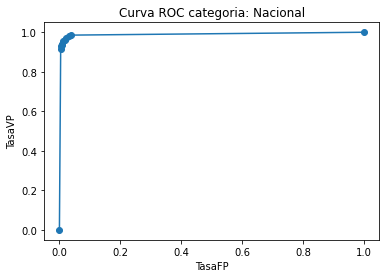

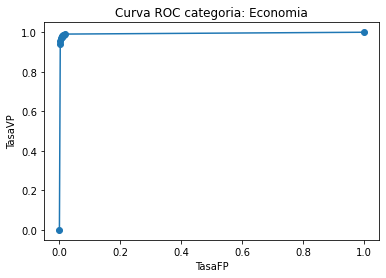

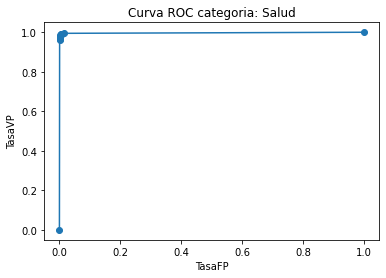

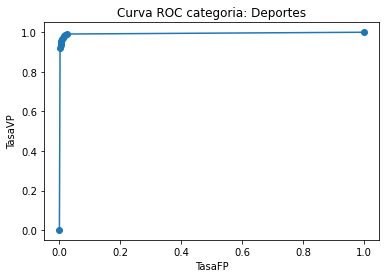

In [ ]:
umbrales=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

#hacemos una curva por categoría
for k in cat_dic.keys():
  #separamos entre:
  #clasificación real = categoría bajo estudio
  VPR = clasificaciones.loc[clasificaciones['Real'] == k].copy()
  #clasificación real != categoría bajo estudio
  FPR = clasificaciones.loc[clasificaciones['Real'] != k].copy()

  #matriz donde vamos a guardar las coordenadas de los puntos ROC
  matriz_ROC= np.zeros([2,11])

  for u in umbrales: #vamos variando el umbral
    VPR_d = VPR.copy()
    FPR_d = FPR.copy()   
    VPR_d.loc[VPR[k] >= u, k] = 'VP' #probalidad de la categoría super umbral
    VPR_d.loc[VPR[k] < u, k] = 'FN' #probabilidad de la categoría no supera umbral
    FPR_d.loc[FPR[k] >= u, k] = 'FP' #probabilidad de la categoría supera umbral pero no era la cat correcta
    FPR_d.loc[FPR[k] < u, k] = 'VN' #probabilidad de la categoría no supera umbral

    #contamos el total de 'VP', 'FN', 'FP' y 'VN' para la categoría y lo guardamos en un df
    met_ROC = pd.DataFrame(VPR_d[k].value_counts().append(FPR_d[k].value_counts()),index=['VP','FP','VN','FN'])
    met_ROC = met_ROC.fillna(0)

    #con eso calculamos las tasas de verdaderos positivos y falsos positivos y guardamos el punto ROC
    matriz_ROC[0,int(10*u)]=met_ROC.loc['FP',k]/(met_ROC.loc['FP',k]+met_ROC.loc['VN',k]) 
    matriz_ROC[1,int(10*u)]=met_ROC.loc['VP',k]/(met_ROC.loc['VP',k]+met_ROC.loc['FN',k])

  #una vez recorridos todos los umbrales graficamos 
  plt.figure()
  plt.scatter(matriz_ROC[0,:],matriz_ROC[1,:])
  plt.plot(matriz_ROC[0,:],matriz_ROC[1,:])
  plt.title('Curva ROC categoria: ' + k)
  plt.xlabel('TasaFP')
  plt.ylabel('TasaVP')
  plt.show()

# Ejercicio 4
El conjunto de datos binary.csv contiene información de la admisión de estudiantes a una
universidad. Las variables son:
* admit: (toma valores 0: no fue admitido, 1 fue admitido),
* GRE: (Graduate Record Exam scores) variable numérica,
* GPA: (grade point average) variable numérica, 
* rank: variable categórica que se refiere al prestigio de la escuela secundaria a la que el alumno asistió y toma valores {1, 2, 3, 4}.

Un investigador está interesado en averiguar cómo influyen estas variables en la admisión. Discretiza las variables GRE y GPA de la siguiente manera GRE ∈ {GRE ≥ 500, GRE < 500} y GPA ∈ {GPA ≥ 3, GPA < 3}. Sabe que estas variables cumplen las relaciones presentadas en la Figura 1.

a) Calcular la probabilidad de que una persona que proviene de una escuela con rango 1 no haya sido admitida en la universidad.

b) Calcular la probabilidad de que una persona que fue a una escuela de rango 2, tenga GRE = 450 y GPA = 3.5 sea admitida en la universidad.

c) En este ejercicio, ¿cuál es el proceso de aprendizaje?


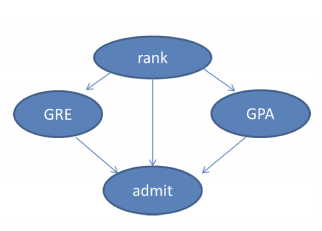

In [ ]:
df_admision

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [ ]:
print(df_admision.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None


In [ ]:
#Discretizamos las variables GRE y GPA
df_admision_d = df_admision.copy()
df_admision_d.loc[df_admision['gre'] < 500, 'gre'] = 0
df_admision_d.loc[df_admision['gre'] >= 500, 'gre'] = 1
df_admision_d.loc[df_admision['gpa'] < 3, 'gpa'] = 0
df_admision_d.loc[df_admision['gpa'] >= 3, 'gpa'] = 1
df_admision_d = df_admision_d.astype(int)

In [ ]:
df_admision_d

,admit,gre,gpa,rank
0,0,0,1,3
1,1,1,1,3
2,1,1,1,1
3,1,1,1,4
4,0,1,0,4
...,...,...,...,...
395,0,1,1,2
396,0,1,1,3
397,0,0,0,2
398,0,1,1,2


In [ ]:
#Contruimos las tablas de probabilidades condicionales asociadas

p_rank = df_admision_d.loc[:,'rank'].value_counts()
p_rank = p_rank/p_rank.sum()

#Tabla Rank (nodo raíz)
df_rank = p_rank.to_frame(name = 'Probabilidad')
df_rank.index.name = 'rank'


#Tabla GRE
p_gre_0 = df_admision_d.loc[df_admision_d['gre'] == 0, 'rank'].value_counts()
p_gre_1 = df_admision_d.loc[df_admision_d['gre'] == 1, 'rank'].value_counts()
p_gre_0 = p_gre_0/df_admision_d.loc[:,'rank'].value_counts()
p_gre_1 = p_gre_1/df_admision_d.loc[:,'rank'].value_counts()
df_gre = p_gre_0.to_frame(name = 'gre<500').join(p_gre_1.to_frame(name='gre>=500'))
df_gre.index.name = 'rank'

#Tabla GPA
p_gpa_0 = df_admision_d.loc[df_admision_d['gpa'] == 0, 'rank'].value_counts()
p_gpa_1 = df_admision_d.loc[df_admision_d['gpa'] == 1, 'rank'].value_counts()
p_gpa_0 = p_gpa_0/df_admision_d.loc[:,'rank'].value_counts()
p_gpa_1 = p_gpa_1/df_admision_d.loc[:,'rank'].value_counts()
df_gpa = p_gpa_0.to_frame(name = 'gpa<3').join(p_gpa_1.to_frame(name='gpa>=3'))
df_gpa.index.name = 'rank'


Probabilidad a priori de cada rank

In [ ]:
df_rank

,Probabilidad
rank,
2,0.3775
3,0.3025
4,0.1675
1,0.1525


Probabilidades de gre dado rank

In [ ]:
df_gre

,gre<500,gre>=500
rank,,
2,0.185430,0.814570
3,0.206612,0.793388
4,0.208955,0.791045
1,0.180328,0.819672


Probabilidades de gpa dado rank

In [ ]:
df_gpa

,gpa<3,gpa>=3
rank,,
2,0.172185,0.827815
3,0.165289,0.834711
4,0.194030,0.805970
1,0.131148,0.868852


In [ ]:
#Tabla admitidos

p_admit_0 = df_admision_d.loc[df_admision_d['admit']==0]
df_admit_0 = p_admit_0.groupby(['rank','gre','gpa']).size()

p_admit_1 = df_admision_d.loc[df_admision_d['admit']==1]
df_admit_1 = p_admit_1.groupby(['rank','gre','gpa']).size()

a=pd.Series([0,0], index=pd.MultiIndex.from_tuples([(3,0,0),(4,0,0)], names=["gre", "gpa", "rank"]))
df_admit_1 = df_admit_1.append(a)

df_admit = df_admit_1.to_frame(name = 'admitido').join(df_admit_0.to_frame(name='no admitido'))
df_admit = df_admit.fillna(0)
df_total= pd.DataFrame(df_admision_d.groupby(['rank','gre','gpa']).size())
df_admit['admitido'] = df_admit['admitido']/df_total[0]
df_admit['no admitido'] = df_admit['no admitido']/df_total[0]


In [ ]:
df_admit

admitido  no admitido
rank gre gpa                       
1    0   0    0.200000     0.800000
         1    0.500000     0.500000
     1   0    1.000000     0.000000
         1    0.553191     0.446809
2    0   0    0.428571     0.571429
         1    0.190476     0.809524
     1   0    0.157895     0.842105
         1    0.423077     0.576923
3    0   1    0.187500     0.812500
     1   0    0.363636     0.636364
         1    0.247059     0.752941
4    0   1    0.200000     0.800000
     1   0    0.111111     0.888889
         1    0.204545     0.795455
3    0   0    0.000000     1.000000
4    0   0    0.000000     1.000000

## Parte a
Probabilidad de no ser admitido dado ranking 1:

$P(admit=0|rank=1)=P(admit=0,rank=1)/P(rank=1)$

In [ ]:
num = df_rank.loc[1]*(df_gre.loc[1,'gre>=500']*df_gpa.loc[1,'gpa>=3']*df_admit.loc[(1,1,1),'no admitido'] + df_gre.loc[1,'gre>=500']*df_gpa.loc[1,'gpa<3']*df_admit.loc[(1,1,0),'no admitido'] + df_gre.loc[1,'gre<500']*df_gpa.loc[1,'gpa>=3']*df_admit.loc[(1,0,1),'no admitido']+df_gre.loc[1,'gre<500']*df_gpa.loc[1,'gpa<3']*df_admit.loc[(1,0,0),'no admitido'])
den= df_rank.loc[1]
print((num/den).round(2)) 

Probabilidad    0.42
Name: 1, dtype: float64


## Parte b
Probabilidad de ser admitido dado ranking 2, gre 450 y gpa 3.5. Aplicando la discretización: gre->0 y gpa->1.

$P(admit=1|rank = 2,gre=0, gpa=1)=\frac{P(admit=1,rank=2,gre=0,gpa=1)}{P(rank=2,gre=0,gpa=1)}$

In [ ]:
num= df_rank.loc[2]*df_gre.loc[2,'gre<500']*df_gpa.loc[2,'gpa>=3']*df_admit.loc[(2,0,1),'admitido']
den= df_rank.loc[2]*df_gre.loc[2,'gre<500']*df_gpa.loc[2,'gpa>=3']
print((num/den).round(2))

Probabilidad    0.19
Name: 2, dtype: float64


## Parte c
El proceso de aprendizaje se da al calcular las probabilidades a posteriori a partir de los datos de train (dataframe df_admit).